<a href="https://colab.research.google.com/github/bqka/ml-lab/blob/main/Experiment%202/Experiment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt

In [2]:
path = kagglehub.dataset_download("camnugent/california-housing-prices")
print(path)

/kaggle/input/california-housing-prices


In [3]:
df = pd.read_csv(path + "/housing.csv")
df = df.drop("ocean_proximity", axis=1)
df.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


In [4]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = df.dropna(subset=['total_bedrooms'])
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Adding column of 1s for bias
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [22]:
class LinearRegression:
  def __init__(self, alpha=0.01, epochs=1000, method='gradient_descent'):
    self.alpha = alpha
    self.epochs = epochs
    self.method = method
    self.loss_history = []
    self.val_loss_history = []

  def fit(self, X, y, X_val=None, y_val=None):
    y = y.reshape((-1, 1))
    self.theta = np.zeros((X.shape[1], 1))

    if(self.method == 'gradient_descent'):
      self.gradient_descent(X, y, X_val, y_val)
    elif (self.method == 'normal_equation'):
      self.normal_equation(X, y)

  def gradient_descent(self, X, y, X_val=None, y_val=None):
    m = len(y)
    for _ in range(self.epochs):
      predictions = X.dot(self.theta)
      self.loss_history.append(np.mean((predictions - y)**2))
      gradients = (1/m) * X.T.dot(predictions - y)
      self.theta -= self.alpha * gradients

      if X_val is not None and y_val is not None:
        val_loss = self.calculate_mse(X_val, y_val)
        self.val_loss_history.append(val_loss)

  def normal_equation(self, X, y):
    self.theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

  def plot_loss(self):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(self.loss_history)), self.loss_history, label="Training Loss")
    if(len(self.val_loss_history) > 0):
      plt.plot(range(len(self.val_loss_history)), self.val_loss_history, label="Validation Loss")

    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title("Loss vs Epochs")
    plt.legend()
    plt.show()

  def predict(self, X):
    return X.dot(self.theta)

  def calculate_mse(self, X, y):
    y_pred = X.dot(self.theta)
    return np.mean((y - y_pred)**2)

  def plot_loss_surface(self, X, y, theta0_range=(-1, 1), theta1_range=(-1, 1), grid_size=50):
    X = X[:, :2]
    m = len(y)

    t0 = np.linspace(theta0_range[0], theta0_range[1], grid_size)
    t1 = np.linspace(theta1_range[0], theta1_range[1], grid_size)
    T0, T1 = np.meshgrid(t0, t1)

    thetas = np.c_[T0.ravel(), T1.ravel()]

    predictions = X.dot(thetas.T)
    y = y.reshape(-1, 1)
    losses = ((predictions - y) ** 2).mean(axis=0)

    Z = losses.reshape(T0.shape)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(T0, T1, Z, cmap='viridis')
    ax.set_xlabel('Theta 0')
    ax.set_ylabel('Theta 1')
    ax.set_zlabel('Loss')
    ax.set_title("Gradient Descent Loss Visualization with 2 Features")
    plt.show()

def PerformanceMetrics(y_pred, y_test):
  MAE = np.mean(np.abs(y_pred - y_test))
  MSE = np.mean((y_pred - y_test) ** 2)
  RMSE = np.sqrt(MSE)

  rss = np.sum((y_test - y_pred) ** 2)
  tss = np.sum((y_test - np.mean(y_test)) ** 2)
  R2 = 1 - rss / tss

  print("Mean Squared Error (MSE):", MSE)
  print("Root Mean Squared Error (RMSE):", RMSE)
  print("Mean Absolute Error (MAE):", MAE)
  print("R^2 Score:", R2)

Mean Squared Error (MSE): 20685487656.404137
Root Mean Squared Error (RMSE): 143824.50297638486
Mean Absolute Error (MAE): 111383.69672646403
R^2 Score: -9510.865724878902


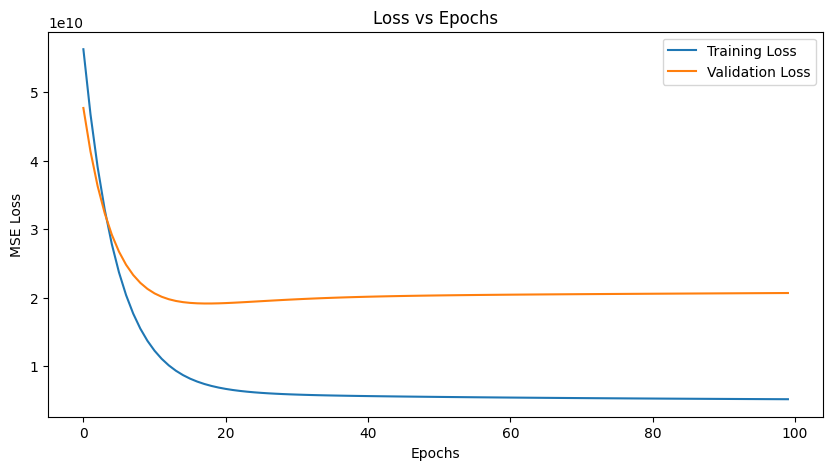

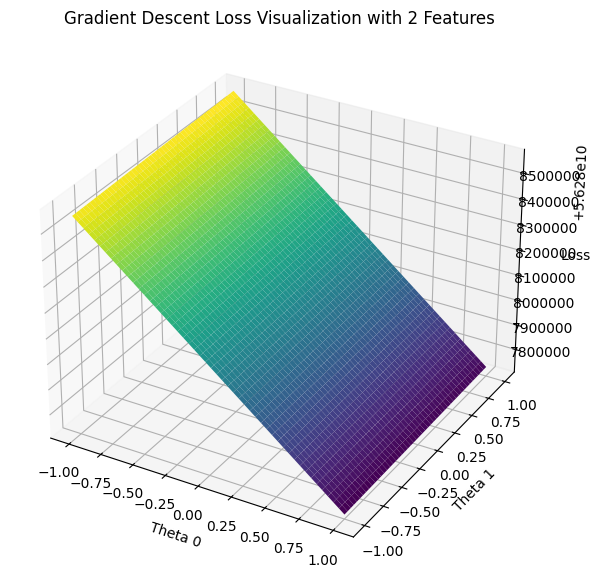

In [17]:
model_gd = LinearRegression(alpha=0.1, epochs=100, method='gradient_descent')
model_gd.fit(X_train, y_train, X_test, y_test)

y_pred_gd = model_gd.predict(X_test)
PerformanceMetrics(y_pred_gd, y_test)

model_gd.plot_loss()
model_gd.plot_loss_surface(X_train, y_train)

In [23]:
model_ne = LinearRegression(method='normal_equation')
model_ne.fit(X_train, y_train)

y_pred_ne = model_ne.predict(X_test)
PerformanceMetrics(y_pred_ne, y_test)

Mean Squared Error (MSE): 21588742095.86018
Root Mean Squared Error (RMSE): 146931.0794075242
Mean Absolute Error (MAE): 114530.57962462516
R^2 Score: -9926.211743605547


In [25]:
# Using scikit learn
from sklearn.linear_model import LinearRegression
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

y_pred_sklearn = model_sklearn.predict(X_test)

In [27]:
# Comparison with Scikit learn

print("Gradient Descent")
PerformanceMetrics(y_pred_gd, y_test)
print("\nNormal Equation")
PerformanceMetrics(y_pred_ne, y_test)
print("\nScikit Learn")
PerformanceMetrics(y_pred_sklearn, y_test)

Gradient Descent
Mean Squared Error (MSE): 20685487656.404137
Root Mean Squared Error (RMSE): 143824.50297638486
Mean Absolute Error (MAE): 111383.69672646403
R^2 Score: -9510.865724878902

Normal Equation
Mean Squared Error (MSE): 21588742095.86018
Root Mean Squared Error (RMSE): 146931.0794075242
Mean Absolute Error (MAE): 114530.57962462516
R^2 Score: -9926.211743605547

Scikit Learn
Mean Squared Error (MSE): 4738972791.400471
Root Mean Squared Error (RMSE): 68840.19749681483
Mean Absolute Error (MAE): 50704.91969284802
R^2 Score: 0.6445130291082352
